In [1]:
import pandas as pd

df = pd.read_csv('quiz4.csv')
df.head()

,Position,Sexe,Temps,Dept,Temps_secondes,Age
0,1,M,00:32:23,76,1643543,40
1,2,M,00:32:40,27,1643560,34
2,3,M,00:33:15,76,1643595,44
3,4,M,00:33:23,76,1643603,46
4,5,M,00:33:29,76,1643609,26


In [5]:
subset1 = df.loc[:, ['Position', 'Age']].copy()
subset1.head()

,Position,Age
0,1,40
1,2,34
2,3,44
3,4,46
4,5,26


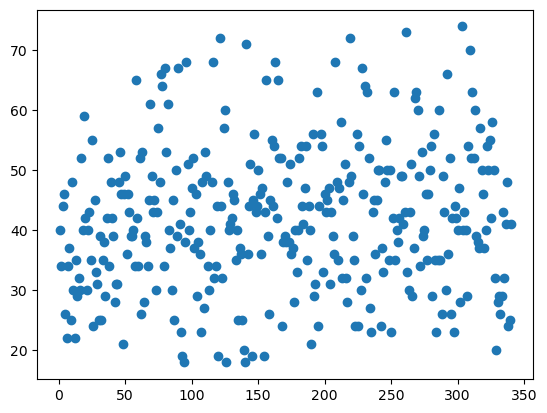

In [7]:
import matplotlib.pyplot as plt

plt.scatter(subset1['Position'], subset1['Age'])
plt.show()

In [8]:
import scipy.stats as st

meanPosition = subset1['Position'].mean()
meanAge = subset1['Age'].mean()

print(meanPosition, meanAge)

170.5 41.95


In [11]:
covarPosition = ((subset1['Position'] - meanPosition)*(subset1['Age'] - meanAge)).sum() / len(subset1)

In [12]:
covarPosition

125.69558823529412

In [13]:
stdPosition = subset1['Position'].std()
stdAge = subset1['Age'].std()
print(stdPosition, stdAge)

98.29377735475764 12.092093762596358


In [14]:
pearson = covarPosition/(stdPosition * stdAge)
print(pearson)

0.10575295310185807


In [15]:
print(st.pearsonr(subset1['Position'], subset1['Age'])[0])

0.10606490871572782


In [32]:
import numpy as np

tranches = np.arange(10,90,10)
subset1['tranche'] = pd.cut(subset1['Age'], tranches)
subset1.head()

,Position,Age,tranche
0,1,40,"(30, 40]"
1,2,34,"(30, 40]"
2,3,44,"(40, 50]"
3,4,46,"(40, 50]"
4,5,26,"(20, 30]"


<AxesSubplot:title={'center':'Position'}, xlabel='tranche'>

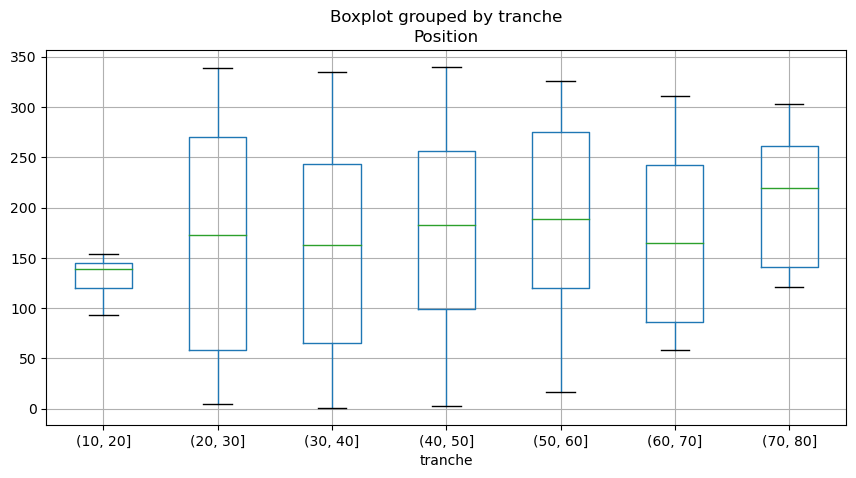

In [34]:
subset1.boxplot(column='Position', by='tranche', figsize=(10,5), showfliers=False)

In [36]:
import statsmodels.api as sm
Y = subset1['Position']
X = subset1[['Age']]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
print(result.params)
a,b = result.params['Age'], result.params['intercept']
print (a,b)

Age            0.862177
intercept    134.331691
dtype: float64
0.8621766194622952 134.33169081355675


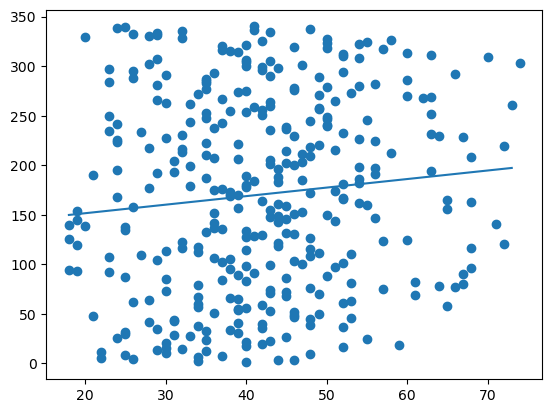

In [38]:
plt.scatter(subset1['Age'], subset1['Position'])
plt.plot(np.arange(18,74,1), [a*x + b for x in np.arange(18,74,1)])
plt.show()

In [39]:
r2 = pearson*pearson
r2

0.011183687089763793

In [41]:
subset2 = df.loc[:, ['Sexe','Temps_secondes']].copy()
subset2.head()

,Sexe,Temps_secondes
0,M,1643543
1,M,1643560
2,M,1643595
3,M,1643603
4,M,1643609


<AxesSubplot:title={'center':'Temps_secondes'}, xlabel='Sexe'>

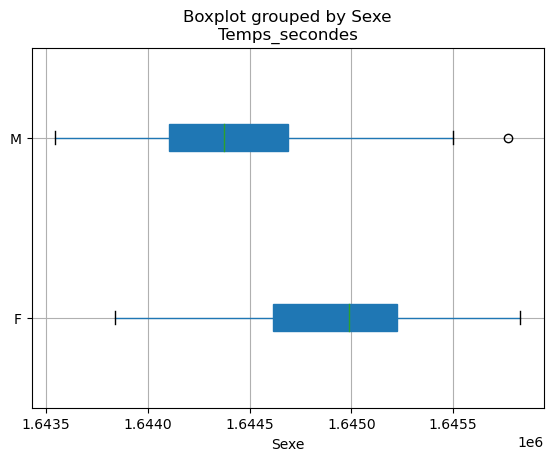

In [43]:
subset2.boxplot(column='Temps_secondes', by='Sexe', vert=False, patch_artist=True)

In [47]:
mu = subset2['Temps_secondes'].mean()

In [48]:
mu

1644553.1235294119

In [49]:
alphaMale = mu - subset2.loc[subset2['Sexe']=='M', 'Temps_secondes'].mean()

In [50]:
alphaFemale = mu - subset2.loc[subset2['Sexe']=='F', 'Temps_secondes'].mean()

In [51]:
print(alphaMale, alphaFemale)

141.3372390891891 -380.9960358054377


In [52]:
effectifMale = len(subset2.loc[subset2['Sexe']=='M'])

In [54]:
effectifFemale = len(subset2.loc[subset2['Sexe']=='F'])

In [55]:
effectifFemale

92

In [57]:
meanMale = subset2.loc[subset2['Sexe']=='M', 'Temps_secondes'].mean()
meanFemale = subset2.loc[subset2['Sexe']=='F', 'Temps_secondes'].mean()

In [72]:
SCE = effectifMale*(meanMale - mu)**2 + effectifFemale*(meanFemale - mu)**2

In [73]:
SCE

18308635.453582115

In [80]:
variationsMale = (((subset2.loc[subset2['Sexe']=='M', 'Temps_secondes'] - mu)**2).sum())

In [81]:
variationsFemale = (((subset2.loc[subset2['Sexe']=='F', 'Temps_secondes'] - mu)**2).sum())

In [82]:
SCT = variationsMale + variationsFemale

In [83]:
SCT

89745936.8117647

In [84]:
eta_squared = SCE / SCT

In [85]:
eta_squared

0.20400517398334245

In [86]:
X = "Sexe" # qualitative
Y = "Temps_secondes" # quantitative

sous_echantillon = subset2.copy()

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    print(SCT, SCE)
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

89745936.8117657 18308635.453582115


0.20400517398334017